In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.datasets import mnist

/Users/rutvikdhopate/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
unique_labels, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(int(label), count)

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [6]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0

X_train, X_val, y_train, y_val = train_test_split(X_train_flat, y_train, test_size=0.2)

In [7]:
from sklearn.svm import SVC

svm = SVC(C = 10.0, degree = 3, gamma = 'scale', kernel = 'rbf')
svm.fit(X_train, y_train)

SVC(C=10.0)

In [8]:
svm_pred = svm.predict(X_val)

In [9]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

acc_svm = round(accuracy_score(y_val, svm_pred),4)
bal_acc_svm = round(balanced_accuracy_score(y_val, svm_pred),4)
precision_svm = round(precision_score(y_val, svm_pred, average = "weighted"),4)
recall_svm = round(recall_score(y_val, svm_pred, average = "weighted"),4)
f1_svm = round(f1_score(y_val, svm_pred, average = "weighted"),4)

print(acc_svm, bal_acc_svm, precision_svm, recall_svm, f1_svm)

0.982 0.9819 0.982 0.982 0.982


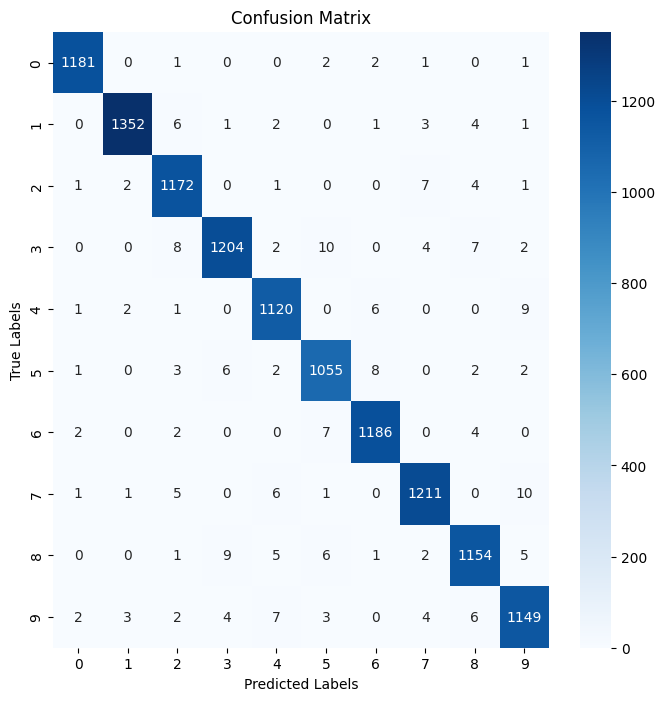

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Calculate the confusion matrix
cm = confusion_matrix(y_val, svm_pred)
classes = unique_labels(y_val, svm_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

xg = GradientBoostingClassifier(loss='log_loss', learning_rate=1.0, n_estimators = 100, criterion = 'squared_error', max_depth = 2)
xg.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=1.0,
                           max_depth=2)

In [12]:
xg_pred = xg.predict(X_val)

In [13]:
acc_xg = round(accuracy_score(y_val, xg_pred),4)
bal_acc_xg = round(balanced_accuracy_score(y_val, xg_pred),4)
precision_xg = round(precision_score(y_val, xg_pred, average = "weighted"),4)
recall_xg = round(recall_score(y_val, xg_pred, average = "weighted"),4)
f1_xg = round(f1_score(y_val, xg_pred, average = "weighted"),4)

print(acc_xg, bal_acc_xg, precision_xg, recall_xg, f1_xg)

0.8956 0.8944 0.8957 0.8956 0.8955


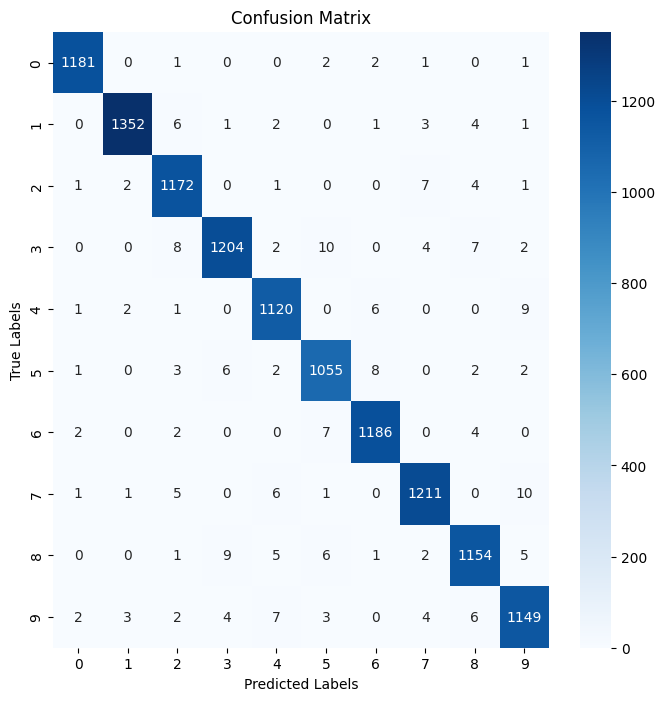

In [14]:
cm_xg = confusion_matrix(y_val, xg_pred)
classes_xg = unique_labels(y_val, xg_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
### Trying on a New Image

import pyheif
image_path = '/Users/rutvikdhopate/Downloads/sample_6.heic'
heif_file = pyheif.read(image_path)
image = Image.frombytes(
    heif_file.mode,
    heif_file.size,
    heif_file.data,
    "raw",
    heif_file.mode,
    heif_file.stride,
)

image = image.convert("L")
# image = image.rotate(180)
image = image.resize((28,28))

In [96]:
from PIL import Image, ImageOps

image_path = '/Users/rutvikdhopate/Downloads/temp_photo.jpg'
image = Image.open(image_path)

image = image.convert("L")
image = image.rotate(180)
image = image.resize((28,28))

In [97]:
# image = ImageOps.invert(image)
# image = ImageOps.mirror(image)

In [98]:
image

In [99]:
temp = np.array(image).reshape(1,-1).astype('float32')/255
print("XG: ", xg.predict(temp), "SVM: ", svm.predict(temp)) 

XG:  [5] SVM:  [5]


In [100]:
len(svm.support_vectors_)

10271

In [108]:
single_tree = xg.estimators_[0, 0]  # Access the first tree in the first stage (change indices if needed)
num_parameters = single_tree.tree_.node_count

# Multiply by the number of stages (n_estimators) to get the total number of parameters in the ensemble
total_parameters = num_parameters * xg.n_estimators

In [105]:
es = accuracy_score(y_val, xg_pred)

# Calculate the margin of error
margin_of_error = 1.96 * np.sqrt(es * (1 - es) / len(y_val))

# Calculate the confidence interval
confidence_interval = (es - margin_of_error, es + margin_of_error)

print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (0.8901118716497766, 0.90105479501689)


In [109]:
total_parameters

700

In [112]:
import xgboost as xgb

In [114]:
xg_boost = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_val)))

In [115]:
xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=10,
              num_parallel_tree=None, ...)

In [117]:
xgb_pred = xg_boost.predict(X_val)

In [118]:
es = accuracy_score(y_val, xgb_pred)

# Calculate the margin of error
margin_of_error = 1.96 * np.sqrt(es * (1 - es) / len(y_val))

# Calculate the confidence interval
confidence_interval = (es - margin_of_error, es + margin_of_error)

print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (0.9727339366179834, 0.9782660633820167)


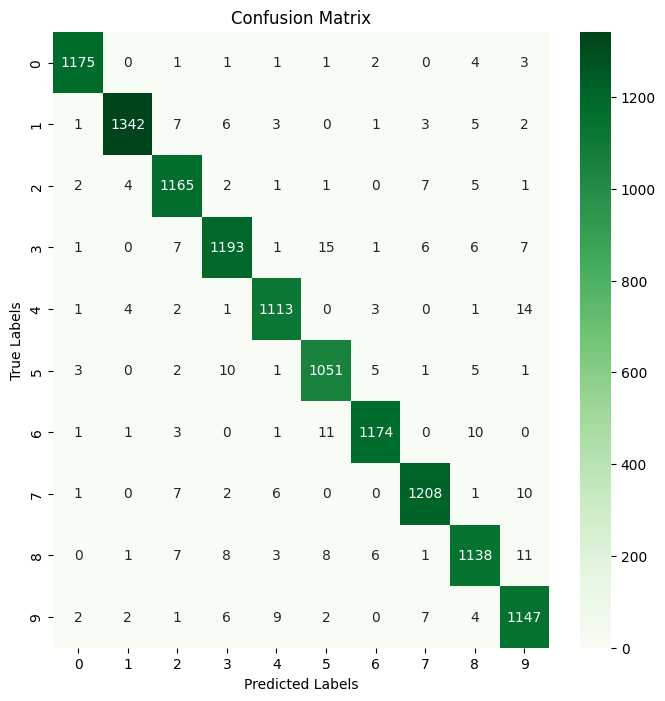

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Calculate the confusion matrix
cm = confusion_matrix(y_val, xgb_pred)
classes = unique_labels(y_val, xgb_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [123]:
accuracy_score(y_val, xgb_pred)

0.9755

In [127]:
xg_boost.get_booster().get_dump()[0].count('\n')

113

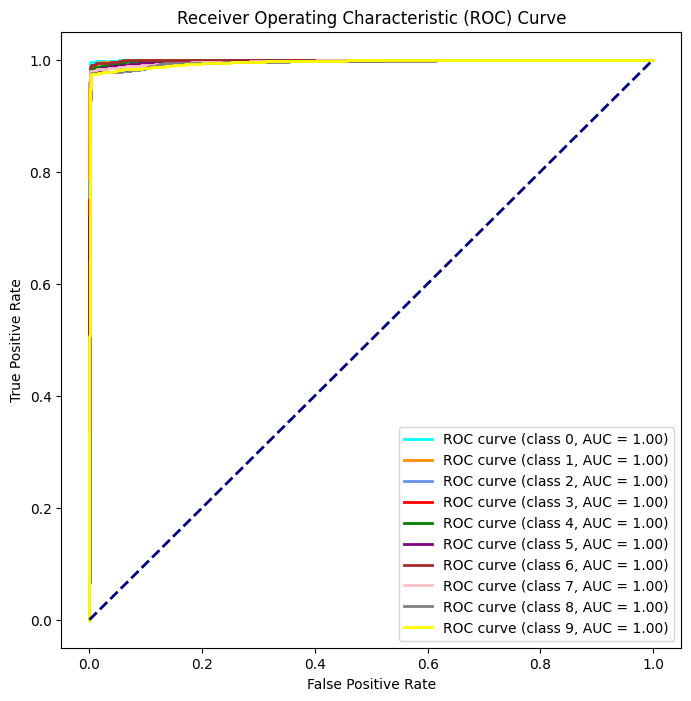

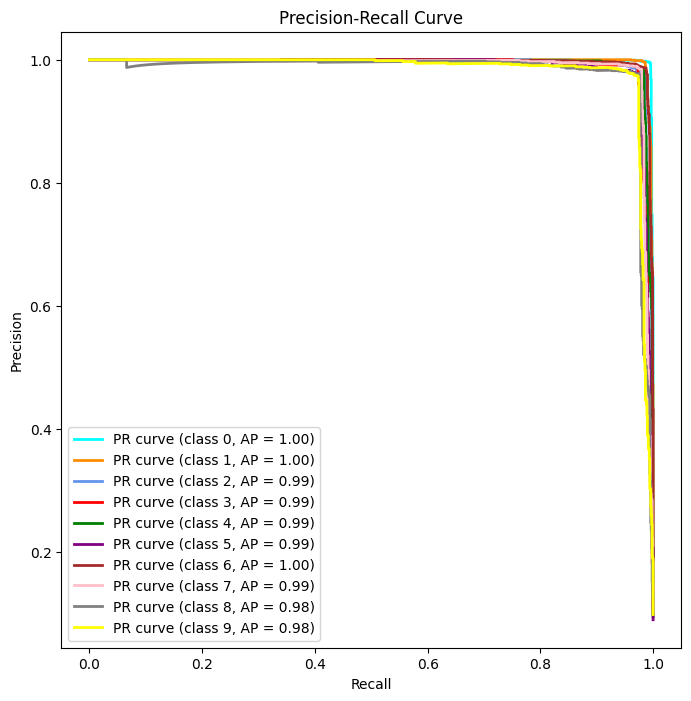

In [134]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsOneClassifier
from itertools import cycle

y_test_bin = label_binarize(y_val, classes=np.unique(y_val))
# Compute ROC curve and ROC-AUC for each class
y_score = svm.decision_function(X_val)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_val))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(np.unique(y_val))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'yellow'])
for i, color in zip(range(len(np.unique(y_val))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curves for each class
plt.figure(figsize=(8, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'yellow'])
for i, color in zip(range(len(np.unique(y_val))), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'PR curve (class {i}, AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()